# Importing libraries and datasets

In [64]:
import pandas as pd
import numpy as np
import os
import statsmodels as sm

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [66]:
path = r'C:\Users\Dan\Desktop\Work\Projects\Wildfires'

In [67]:
df1 = pd.read_csv(os.path.join(path,'fra3.csv'))

In [68]:
df2 = pd.read_csv(os.path.join(path,'ger3.csv'))

In [69]:
df3 = pd.read_csv(os.path.join(path,'gre3.csv'))

In [70]:
df1 . head()

acq_date  latitude  longitude  brightness  acq_time  confidence  \
0  2001-02-07   42.6874     2.3569       304.2      1117          58   
1  2001-02-07   43.1315    -0.3839       308.1      1117          66   
2  2001-02-12   42.5944     2.2348       303.7      1136          53   
3  2001-02-13   42.5821     2.2194       326.7      1041          85   
4  2001-02-13   42.5806     2.2347       327.4      1041          85   

   bright_t31   frp daynight  Year  
0       283.3  11.3        D  2001  
1       285.5  10.0        D  2001  
2       278.2  22.5        D  2001  
3       285.4  44.2        D  2001  
4       286.4  45.4        D  2001

In [71]:
df2 . head()

acq_date  latitude  longitude  brightness  acq_time  confidence  \
0  2001-01-25   51.4900     6.7105       304.9      2119          62   
1  2001-01-26   51.6056     7.0245       302.8      1050          54   
2  2001-01-30   51.4855     7.5162       306.8      1026          64   
3  2001-02-24   51.4888     7.5135       304.2      2130          59   
4  2001-03-06   49.3467     6.7334       303.9      1056          57   

   bright_t31   frp daynight  Year  
0       277.1  12.8        N  2001  
1       275.1   8.9        D  2001  
2       276.1  19.8        D  2001  
3       267.5  12.2        N  2001  
4       283.9   7.3        D  2001

In [72]:
df3 . head()

acq_date  latitude  longitude  brightness  acq_time  confidence  \
0  2001-02-05   38.5614    24.1307       303.2       952          55   
1  2001-02-09   38.0907    24.5261       333.6       928          89   
2  2001-02-09   38.0891    24.5373       303.6       928          55   
3  2001-02-16   35.2956    23.5819       317.8       934          68   
4  2001-02-19   40.7432    22.5022       305.8      1004          62   

   bright_t31   frp daynight  Year  
0       287.3  10.6        D  2001  
1       289.0  34.5        D  2001  
2       286.0   5.8        D  2001  
3       282.8  18.8        D  2001  
4       281.7  17.0        D  2001

In [73]:
df1['acq_date'] = pd.to_datetime(df1['acq_date'])
df1.set_index('acq_date', inplace=True)

In [74]:
df2['acq_date'] = pd.to_datetime(df2['acq_date'])
df2.set_index('acq_date', inplace=True)

In [75]:
df3['acq_date'] = pd.to_datetime(df3['acq_date'])
df3.set_index('acq_date', inplace=True)

In [76]:
df1 . head()

latitude  longitude  brightness  acq_time  confidence  bright_t31  \
acq_date                                                                        
2001-02-07   42.6874     2.3569       304.2      1117          58       283.3   
2001-02-07   43.1315    -0.3839       308.1      1117          66       285.5   
2001-02-12   42.5944     2.2348       303.7      1136          53       278.2   
2001-02-13   42.5821     2.2194       326.7      1041          85       285.4   
2001-02-13   42.5806     2.2347       327.4      1041          85       286.4   

             frp daynight  Year  
acq_date                         
2001-02-07  11.3        D  2001  
2001-02-07  10.0        D  2001  
2001-02-12  22.5        D  2001  
2001-02-13  44.2        D  2001  
2001-02-13  45.4        D  2001

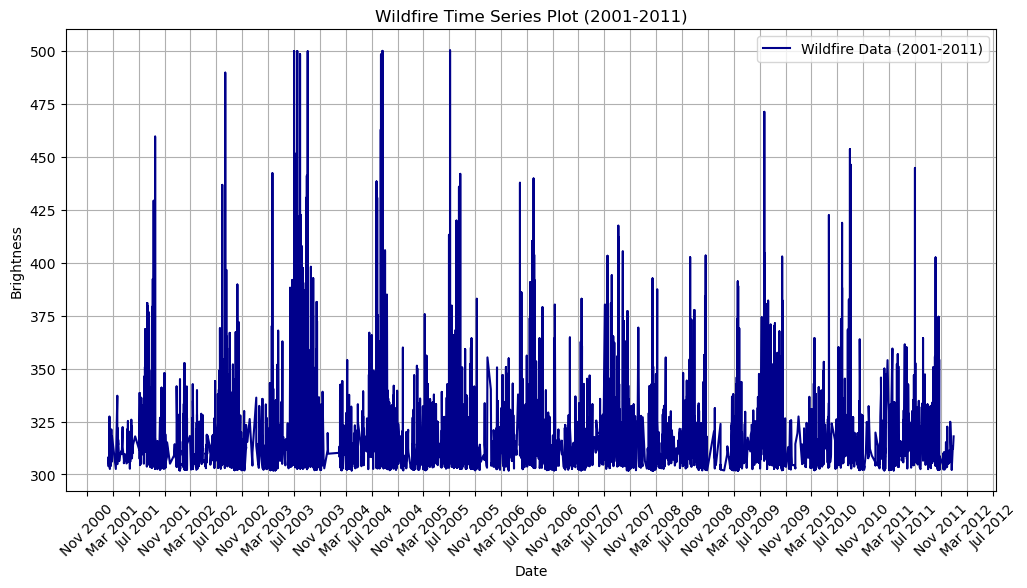

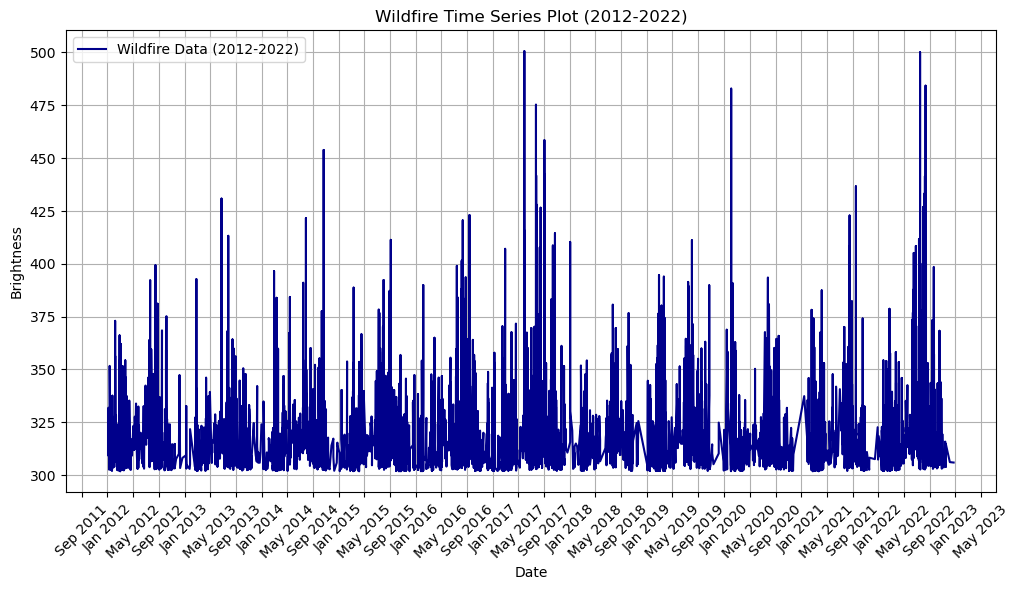

In [77]:
import matplotlib.dates as mdates

# Split the data into two periods: 2001-2011 and 2012-2022
df1_2001_2011 = df1['2001-01-01':'2011-12-31']
df1_2012_2022 = df1['2012-01-01':'2022-12-31']

# Create a time series plot for 2001-2011
plt.figure(figsize=(12, 6))
plt.plot(df1_2001_2011.index, df1_2001_2011['brightness'], label='Wildfire Data (2001-2011)', color='darkblue')
plt.title('Wildfire Time Series Plot (2001-2011)')
plt.xlabel('Date')
plt.ylabel('Brightness')
plt.legend()
plt.grid(True)

# Customize x-axis tick labels to show every 4 months
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Set major ticks for every 4 months
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))  # Format as "Month Year"

# Save the plot as a JPEG image
plt.savefig('France_Wildfire_seasonal_brightness_Time_Series_Plot.jpg', format='jpeg')

plt.show()

# Create a time series plot for 2012-2022
plt.figure(figsize=(12, 6))
plt.plot(df1_2012_2022.index, df1_2012_2022['brightness'], label='Wildfire Data (2012-2022)', color='darkblue')
plt.title('Wildfire Time Series Plot (2012-2022)')
plt.xlabel('Date')
plt.ylabel('Brightness')
plt.legend()
plt.grid(True)

# Customize x-axis tick labels to show every 4 months
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Set major ticks for every 4 months
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))  # Format as "Month Year"

# Save the plot as a JPEG image
plt.savefig('France_Wildfire_seasonal2_brightness_Time_Series_Plot.jpg', format='jpeg')

plt.show()

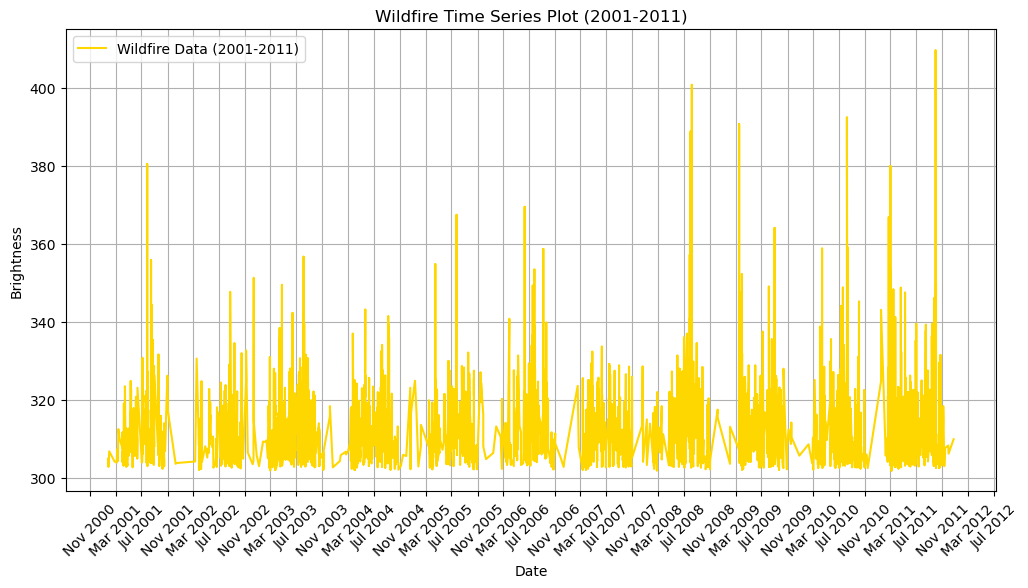

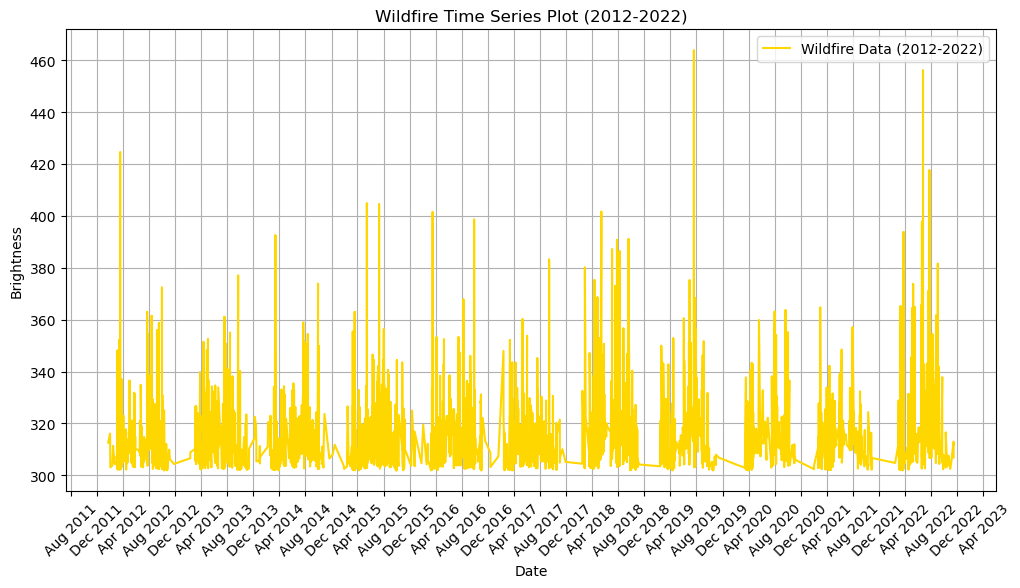

In [78]:
import matplotlib.dates as mdates

# Split the data into two periods: 2001-2011 and 2012-2022
df2_2001_2011 = df2['2001-01-01':'2011-12-31']
df2_2012_2022 = df2['2012-01-01':'2022-12-31']

# Create a time series plot for 2001-2011
plt.figure(figsize=(12, 6))
plt.plot(df2_2001_2011.index, df2_2001_2011['brightness'], label='Wildfire Data (2001-2011)', color='gold')
plt.title('Wildfire Time Series Plot (2001-2011)')
plt.xlabel('Date')
plt.ylabel('Brightness')
plt.legend()
plt.grid(True)

# Customize x-axis tick labels to show every 4 months
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Set major ticks for every 4 months
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))  # Format as "Month Year"

# Save the plot as a JPEG image
plt.savefig('Germany_Wildfire_seasonal_brightness_Time_Series_Plot.jpg', format='jpeg')

plt.show()

# Create a time series plot for 2012-2022
plt.figure(figsize=(12, 6))
plt.plot(df2_2012_2022.index, df2_2012_2022['brightness'], label='Wildfire Data (2012-2022)', color='gold')
plt.title('Wildfire Time Series Plot (2012-2022)')
plt.xlabel('Date')
plt.ylabel('Brightness')
plt.legend()
plt.grid(True)

# Customize x-axis tick labels to show every 4 months
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Set major ticks for every 4 months
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))  # Format as "Month Year"

# Save the plot as a JPEG image
plt.savefig('Germany_Wildfire_seasonal2_brightness_Time_Series_Plot.jpg', format='jpeg')

plt.show()

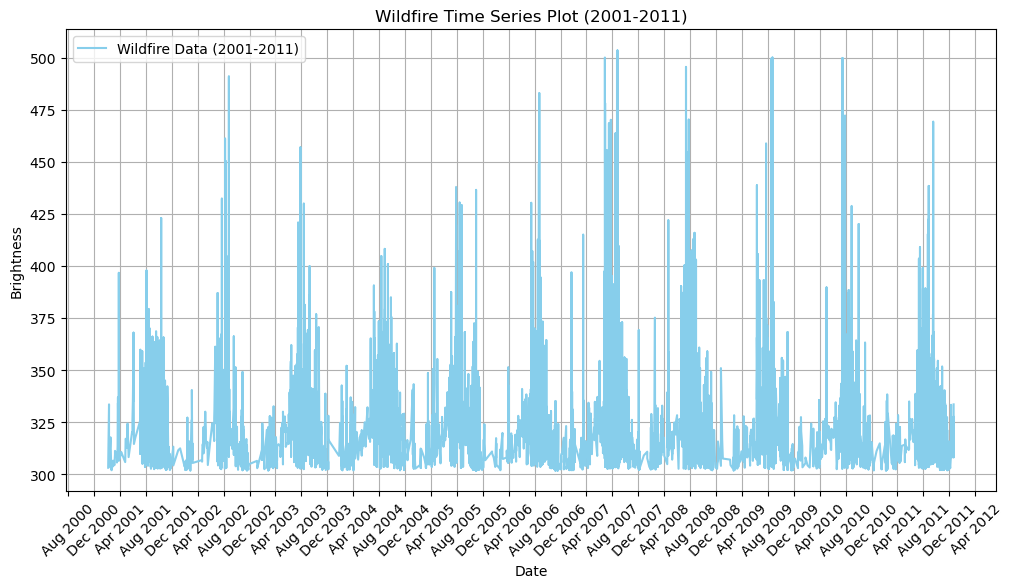

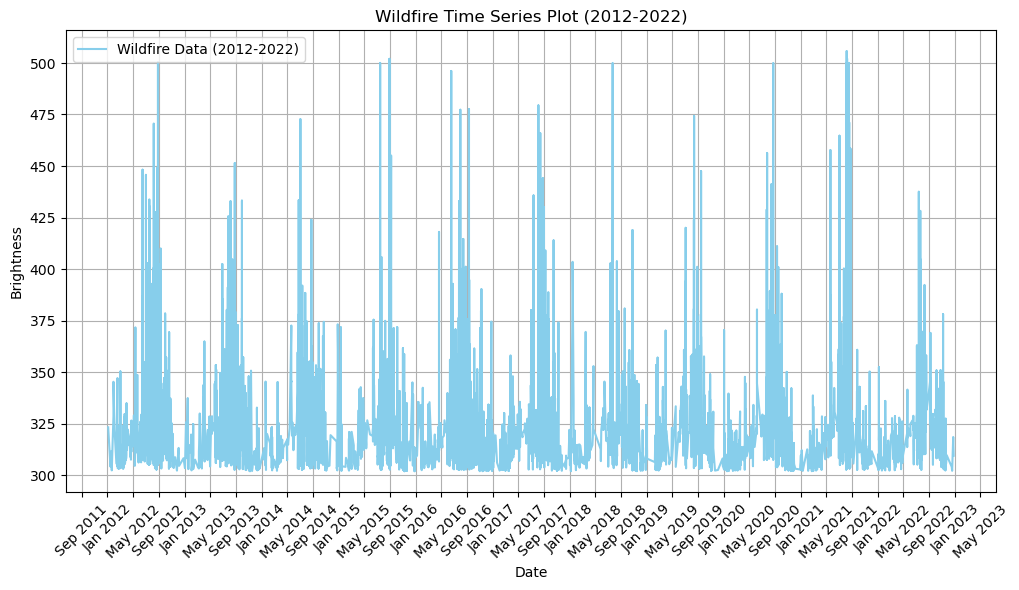

In [79]:
import matplotlib.dates as mdates

# Split the data into two periods: 2001-2011 and 2012-2022
df3_2001_2011 = df3['2001-01-01':'2011-12-31']
df3_2012_2022 = df3['2012-01-01':'2022-12-31']

# Create a time series plot for 2001-2011
plt.figure(figsize=(12, 6))
plt.plot(df3_2001_2011.index, df3_2001_2011['brightness'], label='Wildfire Data (2001-2011)', color='skyblue')
plt.title('Wildfire Time Series Plot (2001-2011)')
plt.xlabel('Date')
plt.ylabel('Brightness')
plt.legend()
plt.grid(True)

# Customize x-axis tick labels to show every 4 months
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Set major ticks for every 4 months
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))  # Format as "Month Year"

# Save the plot as a JPEG image
plt.savefig('Greece_Wildfire_seasonal_brightness_Time_Series_Plot.jpg', format='jpeg')

plt.show()

# Create a time series plot for 2012-2022
plt.figure(figsize=(12, 6))
plt.plot(df3_2012_2022.index, df3_2012_2022['brightness'], label='Wildfire Data (2012-2022)', color='skyblue')
plt.title('Wildfire Time Series Plot (2012-2022)')
plt.xlabel('Date')
plt.ylabel('Brightness')
plt.legend()
plt.grid(True)

# Customize x-axis tick labels to show every 4 months
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Set major ticks for every 4 months
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))  # Format as "Month Year"

# Save the plot as a JPEG image
plt.savefig('Greece_Wildfire_seasonal2_brightness_Time_Series_Plot.jpg', format='jpeg')

plt.show()

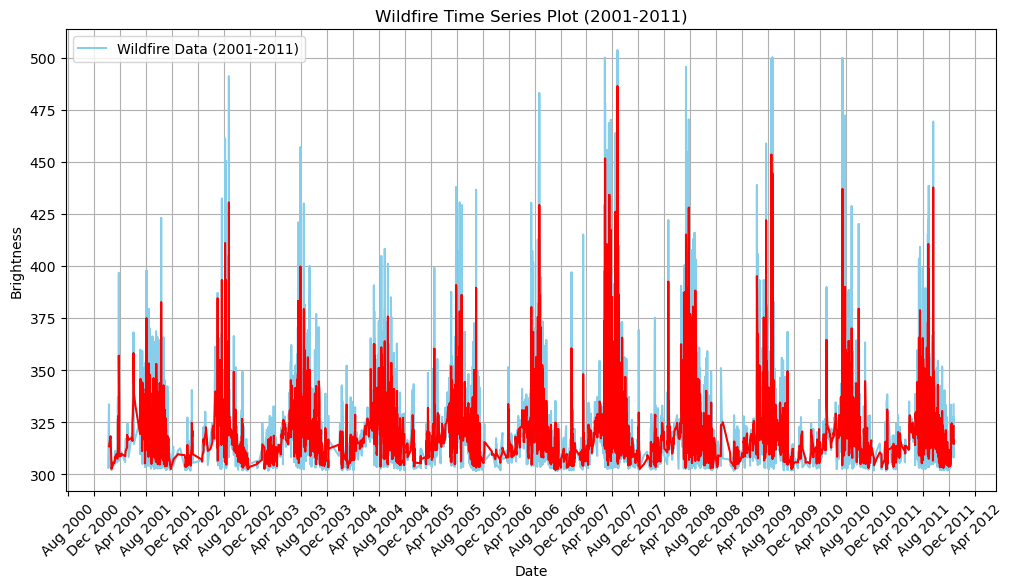

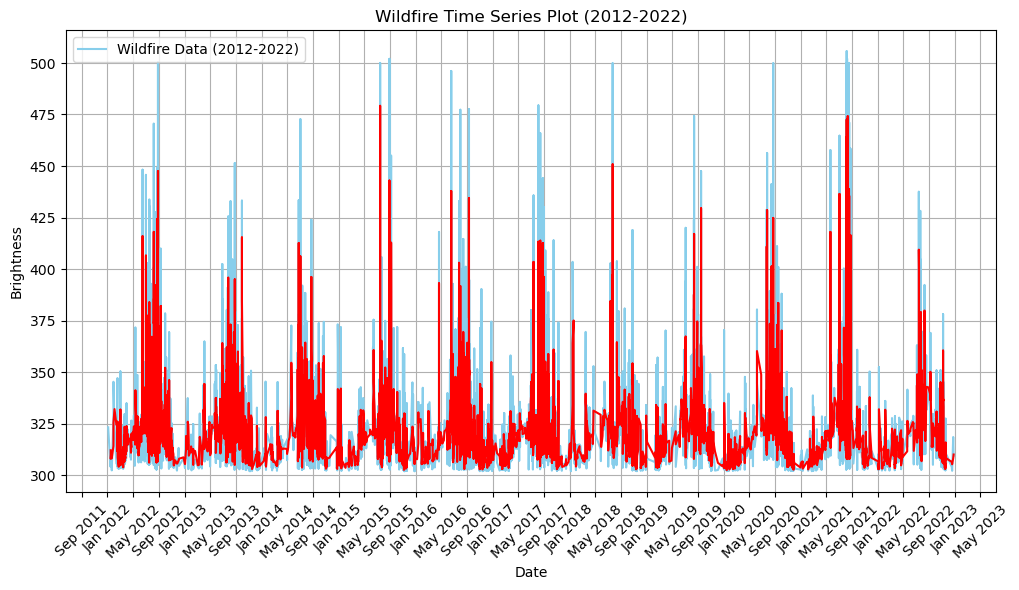

In [80]:
# Split the data into two periods: 2001-2011 and 2012-2022
df3_2001_2011 = df3['2001-01-01':'2011-12-31']
df3_2012_2022 = df3['2012-01-01':'2022-12-31']

# Create a time series plot for 2001-2011
plt.figure(figsize=(12, 6))
plt.plot(df3_2001_2011.index, df3_2001_2011['brightness'], label='Wildfire Data (2001-2011)', color='skyblue')
plt.title('Wildfire Time Series Plot (2001-2011)')
plt.xlabel('Date')
plt.ylabel('Brightness')
plt.legend()
plt.grid(True)

# Calculate a moving average trendline for 2001-2011 (e.g., using a 3-month window)
window_size = 3
moving_average_2001_2011 = df3_2001_2011['brightness'].rolling(window=window_size).mean()
plt.plot(df3_2001_2011.index, moving_average_2001_2011, label=f'{window_size}-Month Moving Average', color='red')

# Customize x-axis tick labels to show every 4 months
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Set major ticks for every 4 months
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))  # Format as "Month Year"

# Save the plot as a JPEG image for 2001-2011
plt.savefig('Greece_Wildfire_seasonal1_brightness_Time_Series_Plot.jpg', format='jpeg')

plt.show()

# Create a time series plot for 2012-2022
plt.figure(figsize=(12, 6))
plt.plot(df3_2012_2022.index, df3_2012_2022['brightness'], label='Wildfire Data (2012-2022)', color='skyblue')
plt.title('Wildfire Time Series Plot (2012-2022)')
plt.xlabel('Date')
plt.ylabel('Brightness')
plt.legend()
plt.grid(True)

# Calculate a moving average trendline for 2012-2022 (e.g., using a 3-month window)
moving_average_2012_2022 = df3_2012_2022['brightness'].rolling(window=window_size).mean()
plt.plot(df3_2012_2022.index, moving_average_2012_2022, label=f'{window_size}-Month Moving Average', color='red')

# Customize x-axis tick labels to show every 4 months
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Set major ticks for every 4 months
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))  # Format as "Month Year"

# Save the plot as a JPEG image for 2012-2022
plt.savefig('Greece_Wildfire_seasonal2_brightness_Time_Series_Plot.jpg', format='jpeg')

plt.show()

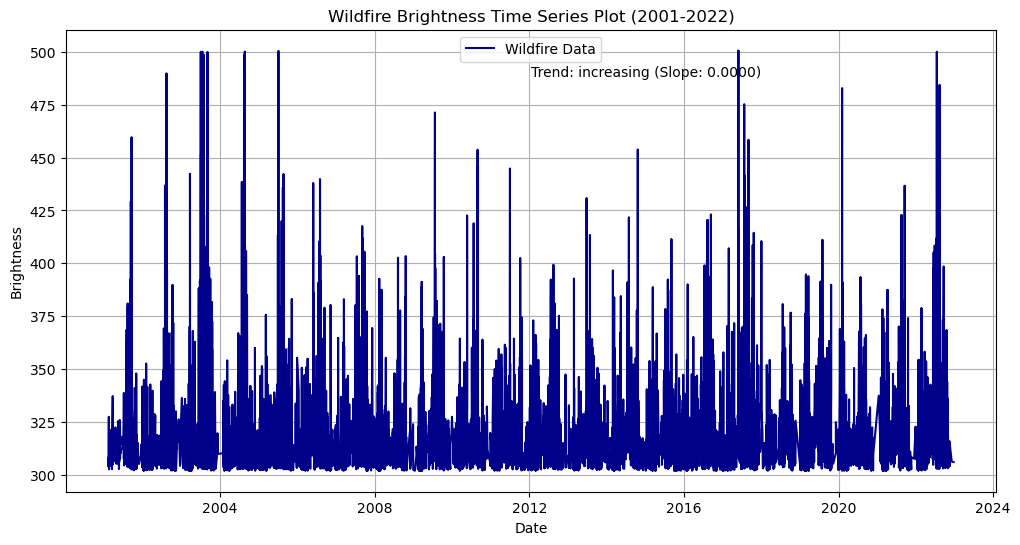

In [81]:
import statsmodels.api as sm

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['brightness'], label='Wildfire Data', color='darkblue')

plt.title('Wildfire Brightness Time Series Plot (2001-2022)')
plt.xlabel('Date')
plt.ylabel('Brightness')
plt.legend()
plt.grid(True)

# Fit a linear regression model
X = sm.add_constant(range(len(df1)))
model = sm.OLS(df1['brightness'], X).fit()
slope = model.params[1]  # Get the slope of the regression line

# If slope is positive, there's an increasing trend; if negative, a decreasing trend
if slope > 0:
    trend = "increasing"
else:
    trend = "decreasing"

plt.text(0.5, 0.9, f'Trend: {trend} (Slope: {slope:.4f})', transform=plt.gca().transAxes)


# Save the plot as a JPEG image for 2012-2022
plt.savefig('France_Wildfire_brightness_trend_Time_Series_Plot.jpg', format='jpeg')

plt.show()

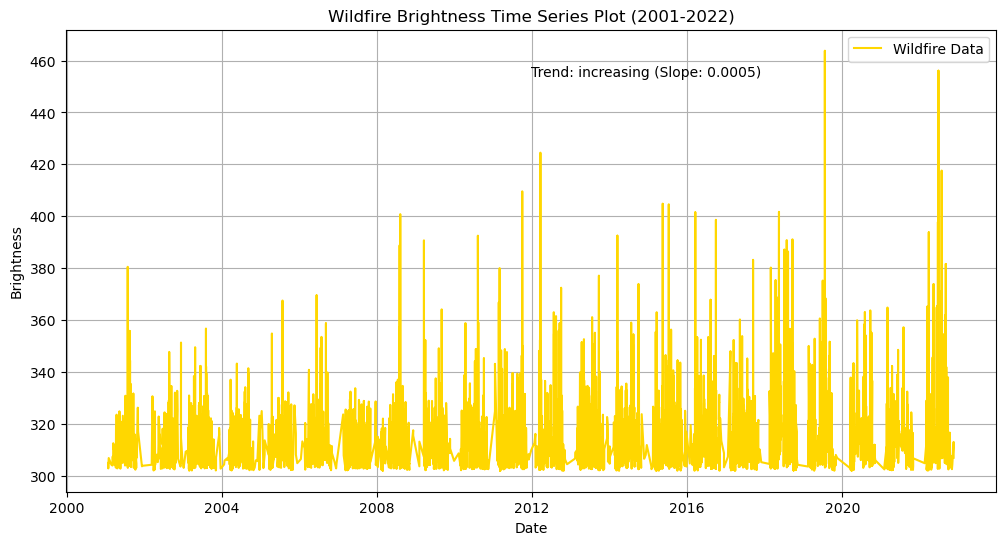

In [82]:
# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(df2.index, df2['brightness'], label='Wildfire Data', color='gold')

plt.title('Wildfire Brightness Time Series Plot (2001-2022)')
plt.xlabel('Date')
plt.ylabel('Brightness')
plt.legend()
plt.grid(True)

# Fit a linear regression model
X = sm.add_constant(range(len(df2)))
model = sm.OLS(df2['brightness'], X).fit()
slope = model.params[1]  # Get the slope of the regression line

# If slope is positive, there's an increasing trend; if negative, a decreasing trend
if slope > 0:
    trend = "increasing"
else:
    trend = "decreasing"

plt.text(0.5, 0.9, f'Trend: {trend} (Slope: {slope:.4f})', transform=plt.gca().transAxes)


# Save the plot as a JPEG image for 2012-2022
plt.savefig('Germany_Wildfire_brightness_trend_Time_Series_Plot.jpg', format='jpeg')

plt.show()

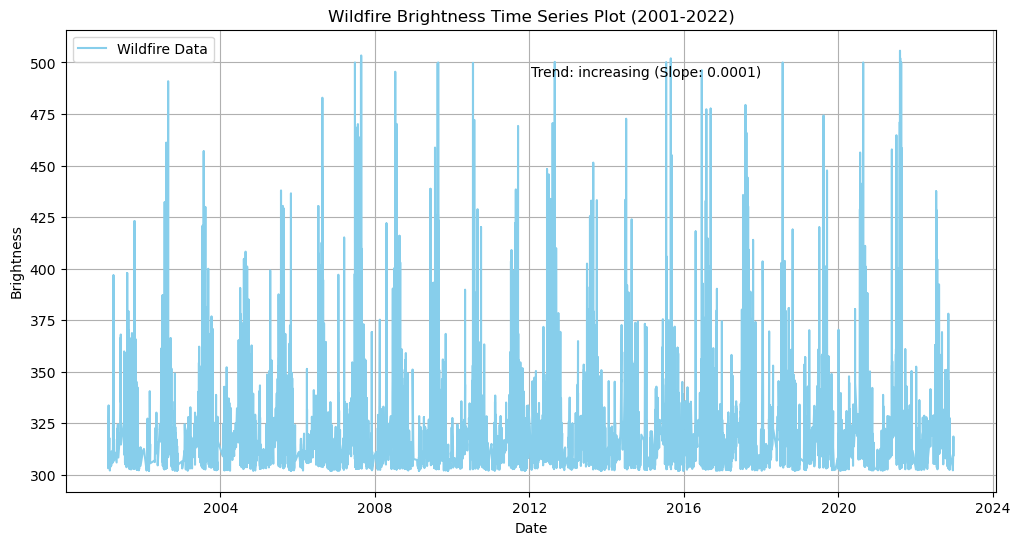

In [83]:
# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(df3.index, df3['brightness'], label='Wildfire Data', color='skyblue')

plt.title('Wildfire Brightness Time Series Plot (2001-2022)')
plt.xlabel('Date')
plt.ylabel('Brightness')
plt.legend()
plt.grid(True)

# Fit a linear regression model
X = sm.add_constant(range(len(df3)))
model = sm.OLS(df3['brightness'], X).fit()
slope = model.params[1]  # Get the slope of the regression line

# If slope is positive, there's an increasing trend; if negative, a decreasing trend
if slope > 0:
    trend = "increasing"
else:
    trend = "decreasing"

plt.text(0.5, 0.9, f'Trend: {trend} (Slope: {slope:.4f})', transform=plt.gca().transAxes)


# Save the plot as a JPEG image for 2012-2022
plt.savefig('Greece_Wildfire_brightness_trend_Time_Series_Plot.jpg', format='jpeg')

plt.show()

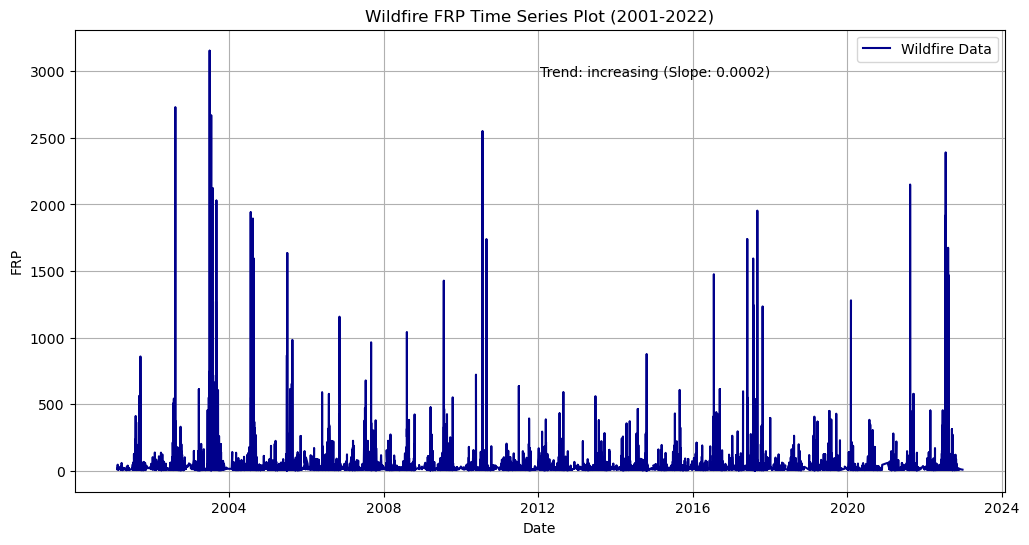

In [84]:
# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['frp'], label='Wildfire Data', color='darkblue')

plt.title('Wildfire FRP Time Series Plot (2001-2022)')
plt.xlabel('Date')
plt.ylabel('FRP')
plt.legend()
plt.grid(True)

# Fit a linear regression model
X = sm.add_constant(range(len(df1)))
model = sm.OLS(df1['frp'], X).fit()
slope = model.params[1]  # Get the slope of the regression line

# If slope is positive, there's an increasing trend; if negative, a decreasing trend
if slope > 0:
    trend = "increasing"
else:
    trend = "decreasing"

plt.text(0.5, 0.9, f'Trend: {trend} (Slope: {slope:.4f})', transform=plt.gca().transAxes)


# Save the plot as a JPEG image for 2012-2022
plt.savefig('France_Wildfire_frp_trend_Time_Series_Plot.jpg', format='jpeg')

plt.show()

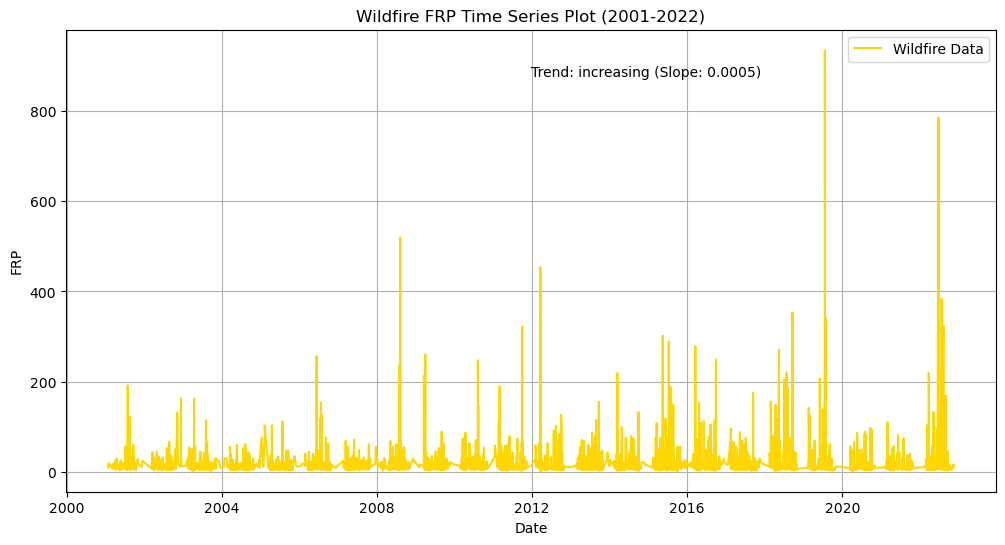

In [85]:
# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(df2.index, df2['frp'], label='Wildfire Data', color='gold')

plt.title('Wildfire FRP Time Series Plot (2001-2022)')
plt.xlabel('Date')
plt.ylabel('FRP')
plt.legend()
plt.grid(True)

# Fit a linear regression model
X = sm.add_constant(range(len(df2)))
model = sm.OLS(df2['frp'], X).fit()
slope = model.params[1]  # Get the slope of the regression line

# If slope is positive, there's an increasing trend; if negative, a decreasing trend
if slope > 0:
    trend = "increasing"
else:
    trend = "decreasing"

plt.text(0.5, 0.9, f'Trend: {trend} (Slope: {slope:.4f})', transform=plt.gca().transAxes)


# Save the plot as a JPEG image for 2012-2022
plt.savefig('Germany_Wildfire_frp_trend_Time_Series_Plot.jpg', format='jpeg')

plt.show()

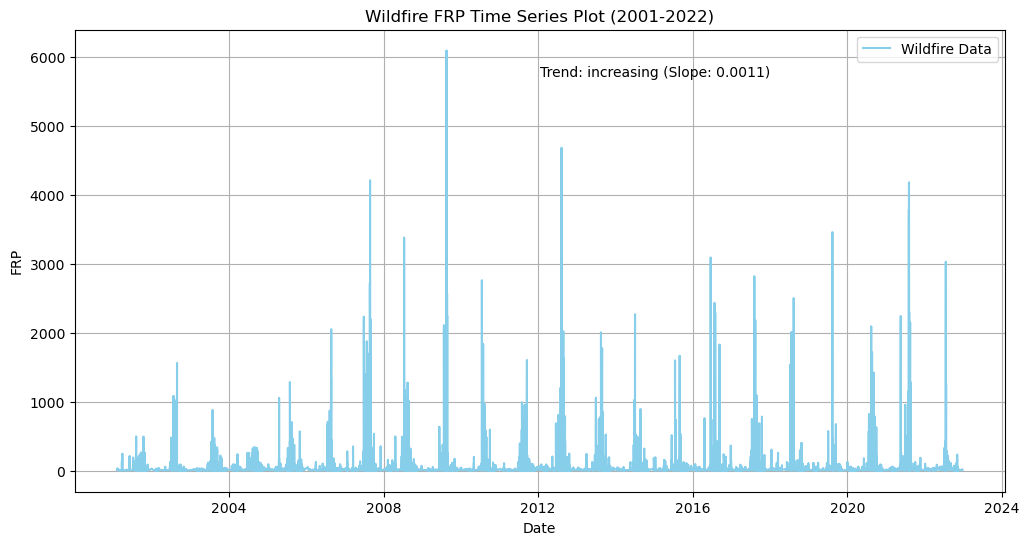

In [86]:
# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(df3.index, df3['frp'], label='Wildfire Data', color='skyblue')

plt.title('Wildfire FRP Time Series Plot (2001-2022)')
plt.xlabel('Date')
plt.ylabel('FRP')
plt.legend()
plt.grid(True)

# Fit a linear regression model
X = sm.add_constant(range(len(df3)))
model = sm.OLS(df3['frp'], X).fit()
slope = model.params[1]  # Get the slope of the regression line

# If slope is positive, there's an increasing trend; if negative, a decreasing trend
if slope > 0:
    trend = "increasing"
else:
    trend = "decreasing"

plt.text(0.5, 0.9, f'Trend: {trend} (Slope: {slope:.4f})', transform=plt.gca().transAxes)


# Save the plot as a JPEG image for 2012-2022
plt.savefig('Greece_Wildfire_frp_trend_Time_Series_Plot.jpg', format='jpeg')

plt.show()

In [87]:
df1 . head()

latitude  longitude  brightness  acq_time  confidence  bright_t31  \
acq_date                                                                        
2001-02-07   42.6874     2.3569       304.2      1117          58       283.3   
2001-02-07   43.1315    -0.3839       308.1      1117          66       285.5   
2001-02-12   42.5944     2.2348       303.7      1136          53       278.2   
2001-02-13   42.5821     2.2194       326.7      1041          85       285.4   
2001-02-13   42.5806     2.2347       327.4      1041          85       286.4   

             frp daynight  Year  
acq_date                         
2001-02-07  11.3        D  2001  
2001-02-07  10.0        D  2001  
2001-02-12  22.5        D  2001  
2001-02-13  44.2        D  2001  
2001-02-13  45.4        D  2001

In [89]:

# Group by year and count the number of fires
fires_per_year = df1.groupby('Year').size().reset_index(name='FireCount')

# Fit a linear regression model to analyze the trend
X = sm.add_constant(range(len(fires_per_year)))
model = sm.OLS(fires_per_year['FireCount'], X).fit()
slope = model.params[1]  # Get the slope of the regression line

# Check if the trend is increasing or decreasing
if slope > 0:
    trend_label = "Trend: increasing"
elif slope < 0:
    trend_label = "Trend: decreasing"
else:
    trend_label = "Trend: no significant change"
print(trend_label)

Trend: decreasing


In [90]:
# Group by year and count the number of fires
fires_per_year = df2.groupby('Year').size().reset_index(name='FireCount')

# Fit a linear regression model to analyze the trend
X = sm.add_constant(range(len(fires_per_year)))
model = sm.OLS(fires_per_year['FireCount'], X).fit()
slope = model.params[1]  # Get the slope of the regression line

# Check if the trend is increasing or decreasing
if slope > 0:
    trend_label = "Trend: increasing"
elif slope < 0:
    trend_label = "Trend: decreasing"
else:
    trend_label = "Trend: no significant change"
print(trend_label)

Trend: increasing


In [91]:
# Group by year and count the number of fires
fires_per_year = df3.groupby('Year').size().reset_index(name='FireCount')

# Fit a linear regression model to analyze the trend
X = sm.add_constant(range(len(fires_per_year)))
model = sm.OLS(fires_per_year['FireCount'], X).fit()
slope = model.params[1]  # Get the slope of the regression line

# Check if the trend is increasing or decreasing
if slope > 0:
    trend_label = "Trend: increasing"
elif slope < 0:
    trend_label = "Trend: decreasing"
else:
    trend_label = "Trend: no significant change"
print(trend_label)

Trend: decreasing


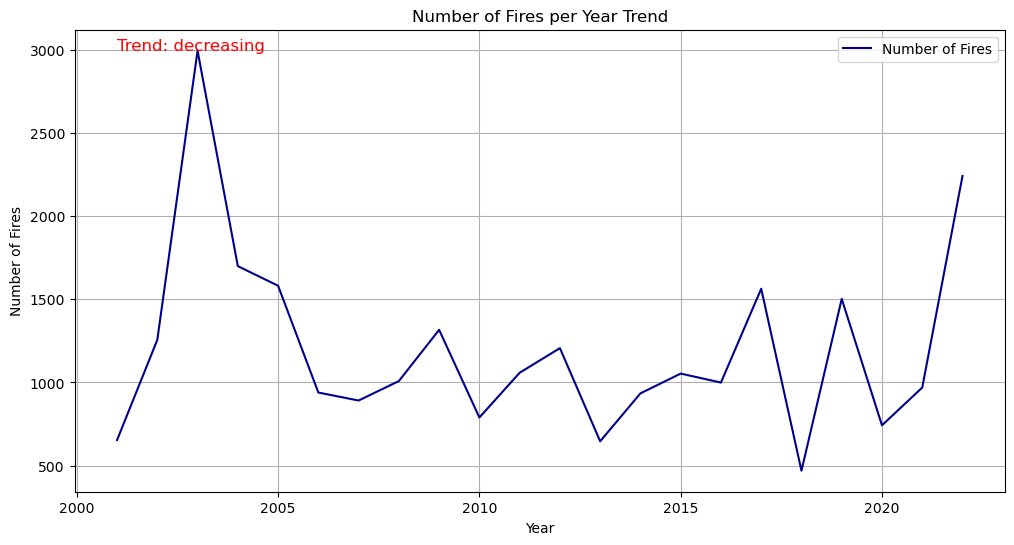

In [93]:
fires_per_year = df1.groupby('Year').size().reset_index(name='FireCount')

# Fit a linear regression model to analyze the trend
X = sm.add_constant(range(len(fires_per_year)))
model = sm.OLS(fires_per_year['FireCount'], X).fit()
slope = model.params[1]  # Get the slope of the regression line

# Check if the trend is increasing or decreasing
if slope > 0:
    trend_label = "Trend: increasing"
elif slope < 0:
    trend_label = "Trend: decreasing"
else:
    trend_label = "Trend: no significant change"

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(fires_per_year['Year'], fires_per_year['FireCount'], label='Number of Fires', color='darkblue')
plt.title('Number of Fires per Year Trend')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.legend()
plt.grid(True)

# Add the trend label as text on the chart
plt.text(2001, max(fires_per_year['FireCount']), trend_label, fontsize=12, color='red')

# Save the plot as a JPEG image
plt.savefig('France_Number_of_Fires_Per_Year_Trend.jpg', format='jpeg')

plt.show()

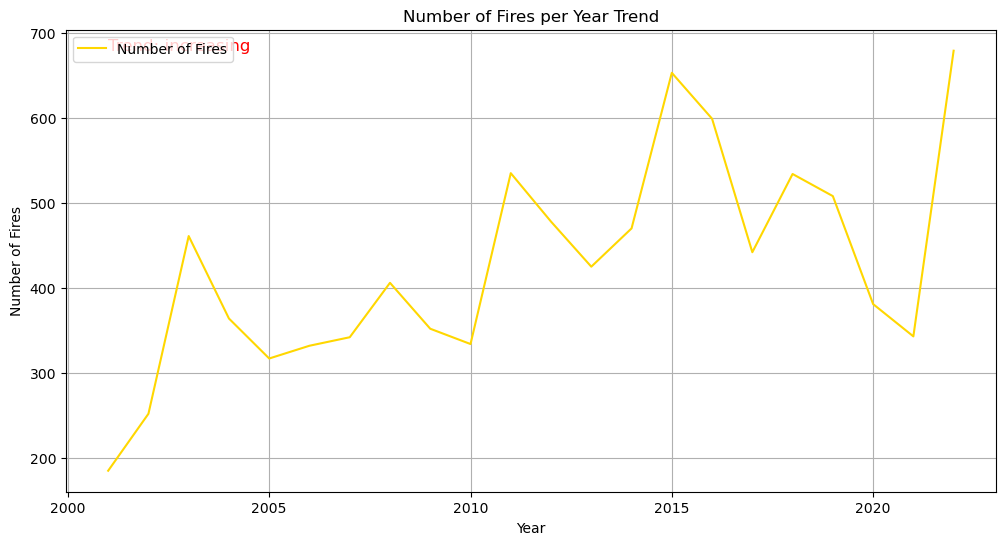

In [94]:
fires_per_year = df2.groupby('Year').size().reset_index(name='FireCount')

# Fit a linear regression model to analyze the trend
X = sm.add_constant(range(len(fires_per_year)))
model = sm.OLS(fires_per_year['FireCount'], X).fit()
slope = model.params[1]  # Get the slope of the regression line

# Check if the trend is increasing or decreasing
if slope > 0:
    trend_label = "Trend: increasing"
elif slope < 0:
    trend_label = "Trend: decreasing"
else:
    trend_label = "Trend: no significant change"

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(fires_per_year['Year'], fires_per_year['FireCount'], label='Number of Fires', color='gold')
plt.title('Number of Fires per Year Trend')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.legend()
plt.grid(True)

# Add the trend label as text on the chart
plt.text(2001, max(fires_per_year['FireCount']), trend_label, fontsize=12, color='red')

# Save the plot as a JPEG image
plt.savefig('Germany_Number_of_Fires_Per_Year_Trend.jpg', format='jpeg')

plt.show()

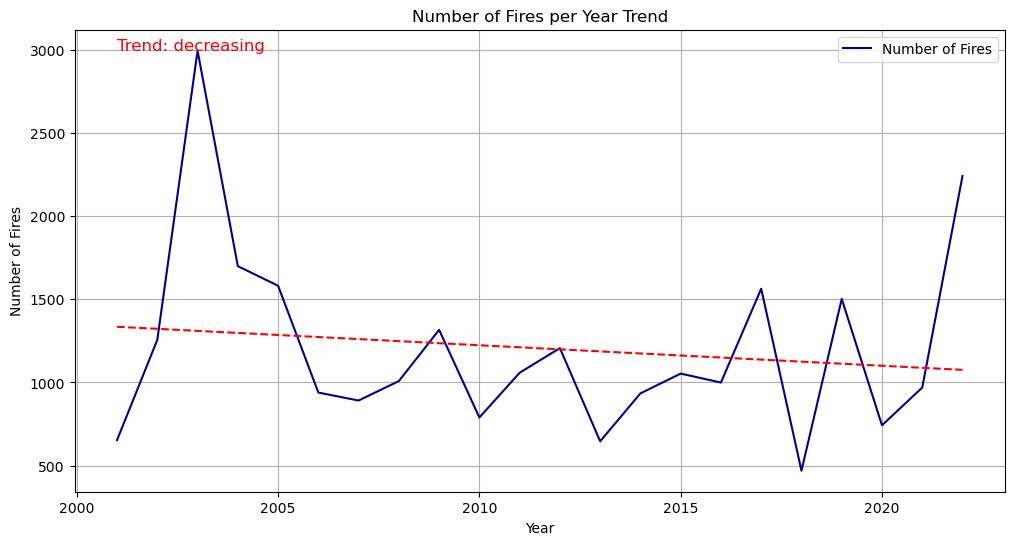

In [95]:
# Group by year and count the number of fires
fires_per_year = df1.groupby('Year').size().reset_index(name='FireCount')

# Fit a linear regression model to analyze the trend
X = sm.add_constant(range(len(fires_per_year)))
model = sm.OLS(fires_per_year['FireCount'], X).fit()
slope = model.params[1]  # Get the slope of the regression line

# Check if the trend is increasing or decreasing
if slope > 0:
    trend_label = "Trend: increasing"
elif slope < 0:
    trend_label = "Trend: decreasing"
else:
    trend_label = "Trend: no significant change"

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(fires_per_year['Year'], fires_per_year['FireCount'], label='Number of Fires', color='darkblue')
plt.title('Number of Fires per Year Trend')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.legend()
plt.grid(True)

# Add the trend label as text on the chart
plt.text(2001, max(fires_per_year['FireCount']), trend_label, fontsize=12, color='red')

# Fit a trend line to the data
trend_line = model.params[0] + model.params[1] * range(len(fires_per_year))

# Plot the trend line
plt.plot(fires_per_year['Year'], trend_line, label='Trend Line', linestyle='--', color='red')

# Save the plot as a JPEG image
plt.savefig('France_Number_of_Fires_Per_Year_Trend2.jpg', format='jpeg')

plt.show()

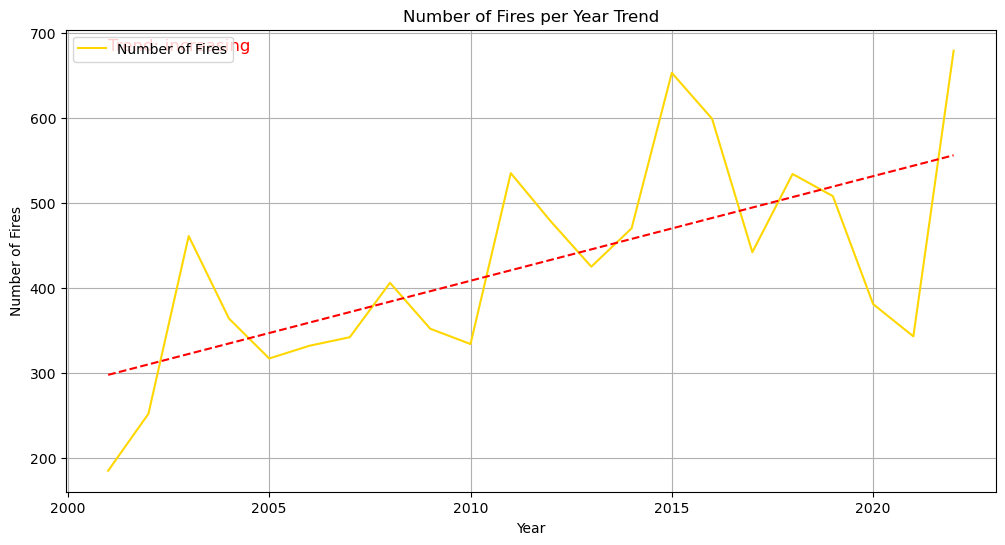

In [96]:
# Group by year and count the number of fires
fires_per_year = df2.groupby('Year').size().reset_index(name='FireCount')

# Fit a linear regression model to analyze the trend
X = sm.add_constant(range(len(fires_per_year)))
model = sm.OLS(fires_per_year['FireCount'], X).fit()
slope = model.params[1]  # Get the slope of the regression line

# Check if the trend is increasing or decreasing
if slope > 0:
    trend_label = "Trend: increasing"
elif slope < 0:
    trend_label = "Trend: decreasing"
else:
    trend_label = "Trend: no significant change"

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(fires_per_year['Year'], fires_per_year['FireCount'], label='Number of Fires', color='gold')
plt.title('Number of Fires per Year Trend')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.legend()
plt.grid(True)

# Add the trend label as text on the chart
plt.text(2001, max(fires_per_year['FireCount']), trend_label, fontsize=12, color='red')

# Fit a trend line to the data
trend_line = model.params[0] + model.params[1] * range(len(fires_per_year))

# Plot the trend line
plt.plot(fires_per_year['Year'], trend_line, label='Trend Line', linestyle='--', color='red')

# Save the plot as a JPEG image
plt.savefig('Germany_Number_of_Fires_Per_Year_Trend2.jpg', format='jpeg')

plt.show()

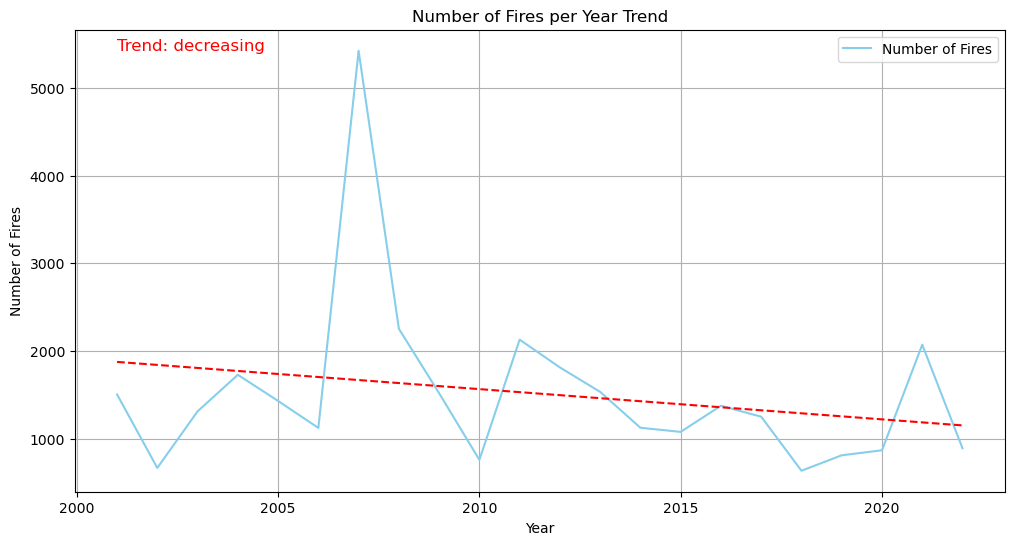

In [97]:
# Group by year and count the number of fires
fires_per_year = df3.groupby('Year').size().reset_index(name='FireCount')

# Fit a linear regression model to analyze the trend
X = sm.add_constant(range(len(fires_per_year)))
model = sm.OLS(fires_per_year['FireCount'], X).fit()
slope = model.params[1]  # Get the slope of the regression line

# Check if the trend is increasing or decreasing
if slope > 0:
    trend_label = "Trend: increasing"
elif slope < 0:
    trend_label = "Trend: decreasing"
else:
    trend_label = "Trend: no significant change"

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(fires_per_year['Year'], fires_per_year['FireCount'], label='Number of Fires', color='skyblue')
plt.title('Number of Fires per Year Trend')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.legend()
plt.grid(True)

# Add the trend label as text on the chart
plt.text(2001, max(fires_per_year['FireCount']), trend_label, fontsize=12, color='red')

# Fit a trend line to the data
trend_line = model.params[0] + model.params[1] * range(len(fires_per_year))

# Plot the trend line
plt.plot(fires_per_year['Year'], trend_line, label='Trend Line', linestyle='--', color='red')

# Save the plot as a JPEG image
plt.savefig('Greece_Number_of_Fires_Per_Year_Trend2.jpg', format='jpeg')

plt.show()

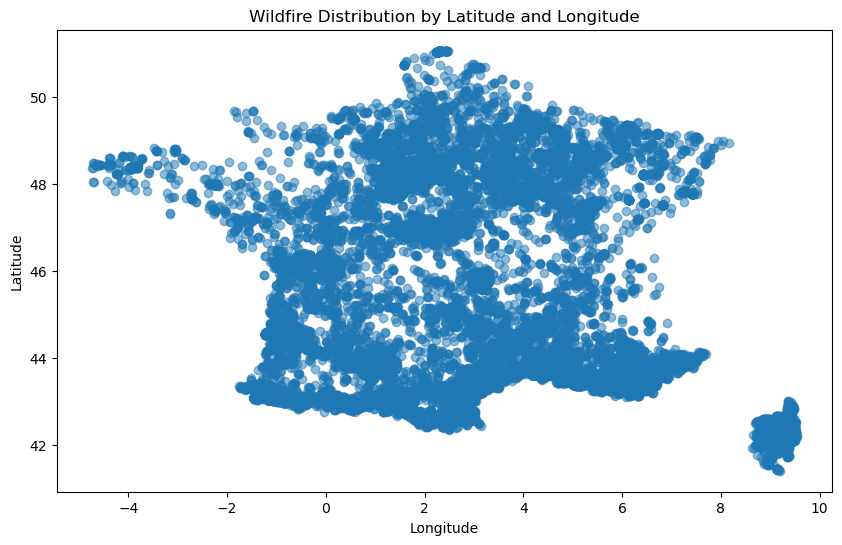

In [98]:
import matplotlib.pyplot as plt

# Extract latitude and longitude columns from your DataFrame
latitudes = df1['latitude']
longitudes = df1['longitude']

plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, alpha=0.5)  # Adjust alpha for transparency

plt.title('Wildfire Distribution by Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

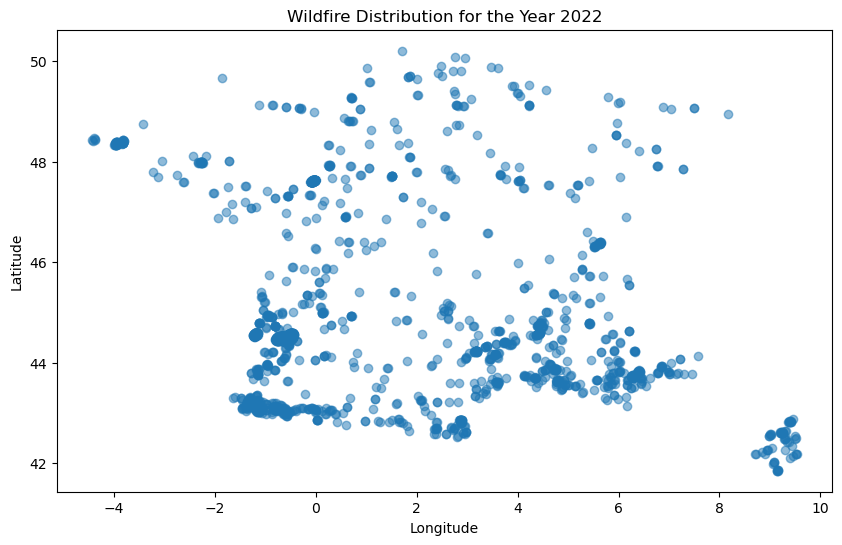

In [104]:
year_to_analyze = 2022  # Replace with the year you want to analyze

# Filter data for the specified year
data_for_specific_year = df1[df1['Year'] == year_to_analyze]

# Extract latitude and longitude columns
latitudes = data_for_specific_year['latitude']
longitudes = data_for_specific_year['longitude']

# Create the scatter plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, alpha=0.5)

plt.title(f'Wildfire Distribution for the Year {year_to_analyze}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# Save the plot as a JPEG image
plt.savefig('France_Fire_locations_2022.jpg', format='jpeg')

plt.show()

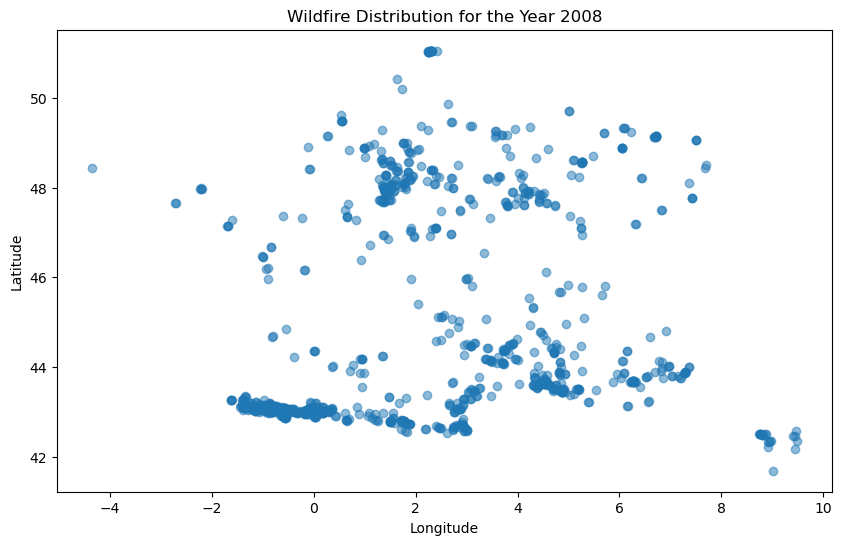

In [105]:
year_to_analyze = 2008  # Replace with the year you want to analyze

# Filter data for the specified year
data_for_specific_year = df1[df1['Year'] == year_to_analyze]

# Extract latitude and longitude columns
latitudes = data_for_specific_year['latitude']
longitudes = data_for_specific_year['longitude']

# Create the scatter plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, alpha=0.5)

plt.title(f'Wildfire Distribution for the Year {year_to_analyze}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Save the plot as a JPEG image
plt.savefig('France_Fire_locations_2008.jpg', format='jpeg')

plt.show()

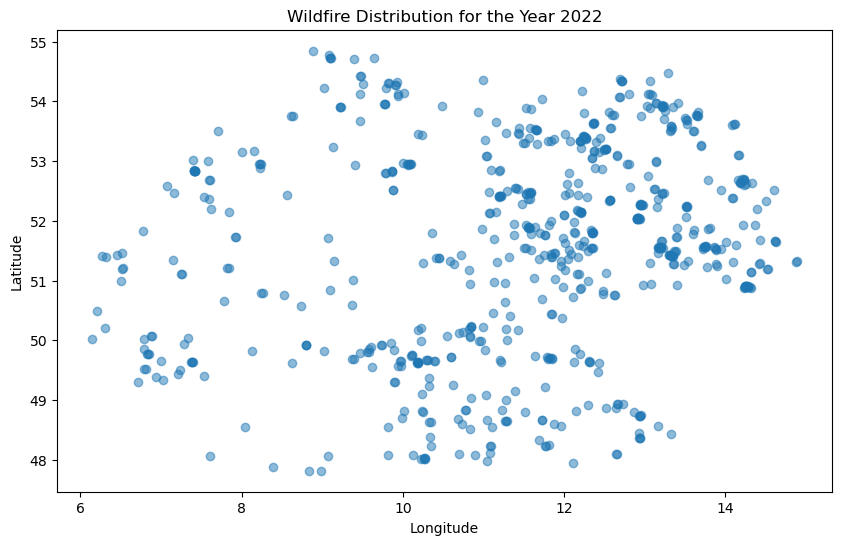

In [106]:
year_to_analyze = 2022  # Replace with the year you want to analyze

# Filter data for the specified year
data_for_specific_year = df2[df2['Year'] == year_to_analyze]

# Extract latitude and longitude columns
latitudes = data_for_specific_year['latitude']
longitudes = data_for_specific_year['longitude']

# Create the scatter plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, alpha=0.5)

plt.title(f'Wildfire Distribution for the Year {year_to_analyze}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# Save the plot as a JPEG image
plt.savefig('Germany_Fire_locations_2022.jpg', format='jpeg')

plt.show()

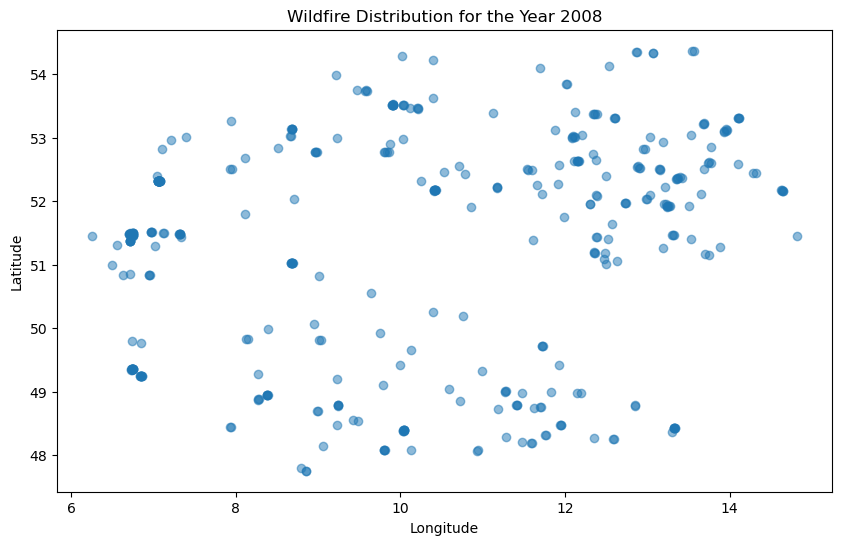

In [107]:
year_to_analyze = 2008  # Replace with the year you want to analyze

# Filter data for the specified year
data_for_specific_year = df2[df2['Year'] == year_to_analyze]

# Extract latitude and longitude columns
latitudes = data_for_specific_year['latitude']
longitudes = data_for_specific_year['longitude']

# Create the scatter plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, alpha=0.5)

plt.title(f'Wildfire Distribution for the Year {year_to_analyze}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# Save the plot as a JPEG image
plt.savefig('Germany_Fire_locations_2008.jpg', format='jpeg')

plt.show()

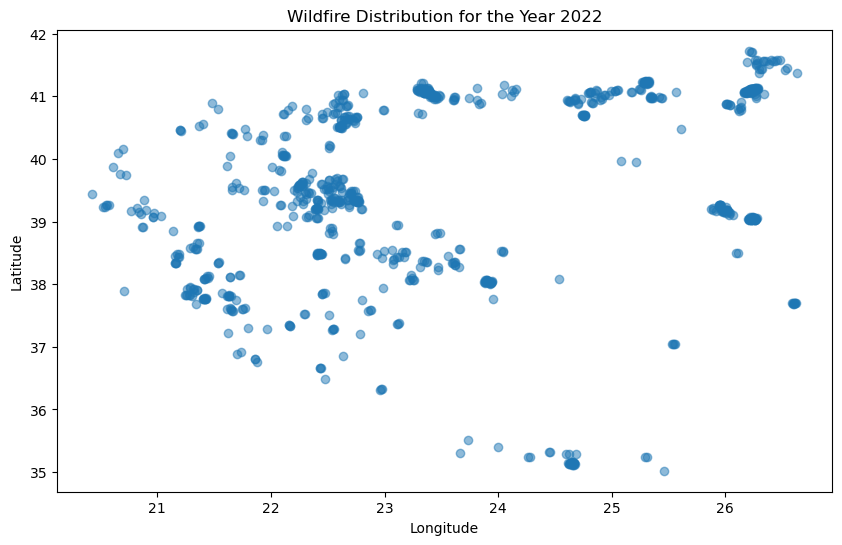

In [108]:
year_to_analyze = 2022  # Replace with the year you want to analyze

# Filter data for the specified year
data_for_specific_year = df3[df3['Year'] == year_to_analyze]

# Extract latitude and longitude columns
latitudes = data_for_specific_year['latitude']
longitudes = data_for_specific_year['longitude']

# Create the scatter plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, alpha=0.5)

plt.title(f'Wildfire Distribution for the Year {year_to_analyze}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# Save the plot as a JPEG image
plt.savefig('Greece_Fire_locations_2022.jpg', format='jpeg')

plt.show()

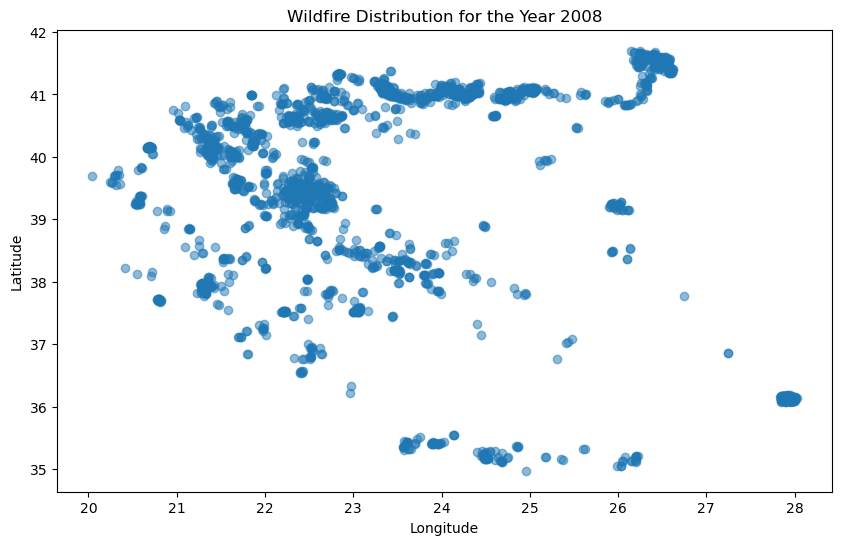

In [109]:
year_to_analyze = 2008  # Replace with the year you want to analyze

# Filter data for the specified year
data_for_specific_year = df3[df3['Year'] == year_to_analyze]

# Extract latitude and longitude columns
latitudes = data_for_specific_year['latitude']
longitudes = data_for_specific_year['longitude']

# Create the scatter plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, alpha=0.5)

plt.title(f'Wildfire Distribution for the Year {year_to_analyze}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# Save the plot as a JPEG image
plt.savefig('Greece_Fire_locations_2008.jpg', format='jpeg')

plt.show()

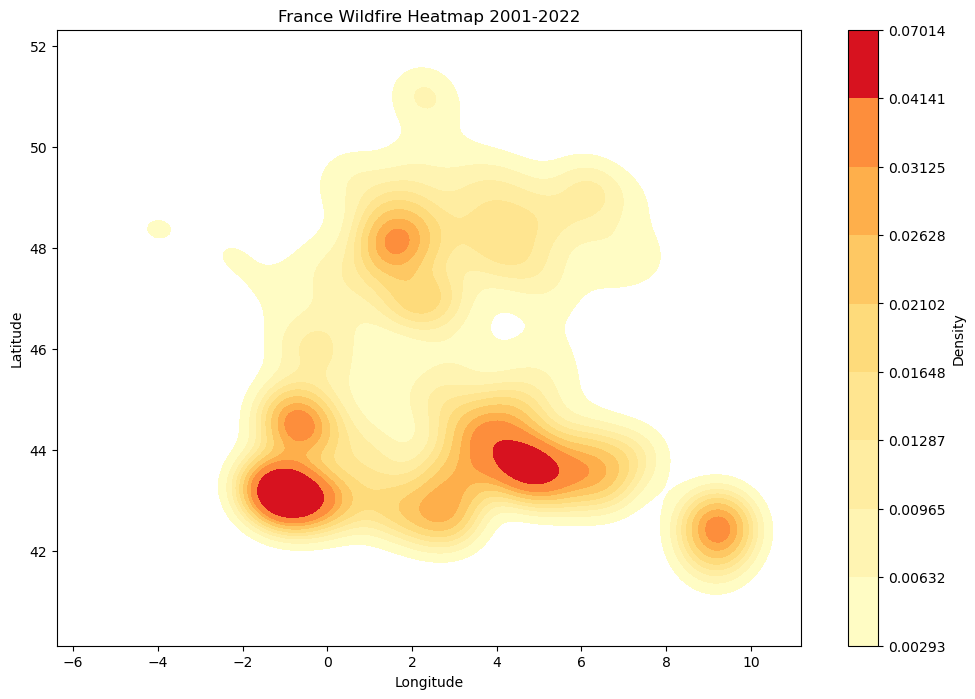

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Create a 2D kernel density estimation (KDE) heatmap of the wildfire distribution
sns.kdeplot(
    data=df1,
    x='longitude',
    y='latitude',
    cmap='YlOrRd',  # Adjust the color map as needed
    cbar=True,
    cbar_kws={'label': 'Density'},
    fill=True,  # You can set this to False for an outline-only heatmap
)
plt.title('France Wildfire Heatmap 2001-2022')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Save the plot as a JPEG image
plt.savefig('France_Fire_heatmap.jpg', format='jpeg')

plt.show()

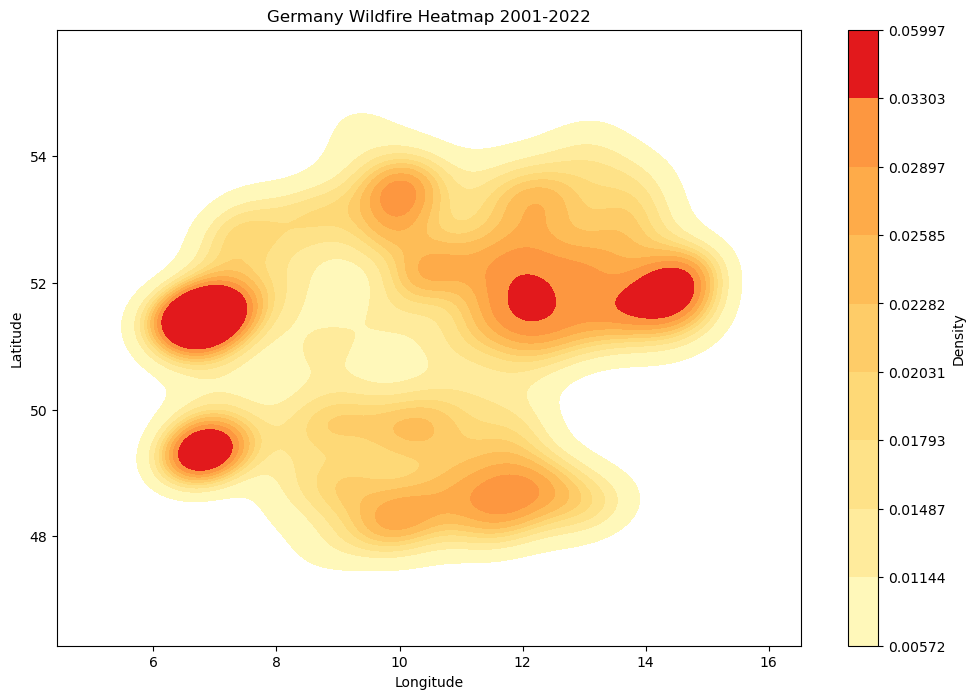

In [132]:
plt.figure(figsize=(12, 8))

# Create a 2D kernel density estimation (KDE) heatmap of the wildfire distribution
sns.kdeplot(
    data=df2,
    x='longitude',
    y='latitude',
    cmap='YlOrRd',  # Adjust the color map as needed
    cbar=True,
    cbar_kws={'label': 'Density'},
    fill=True,  # You can set this to False for an outline-only heatmap
)
plt.title('Germany Wildfire Heatmap 2001-2022')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Save the plot as a JPEG image
plt.savefig('Germany_Fire_heatmap.jpg', format='jpeg')

plt.show()

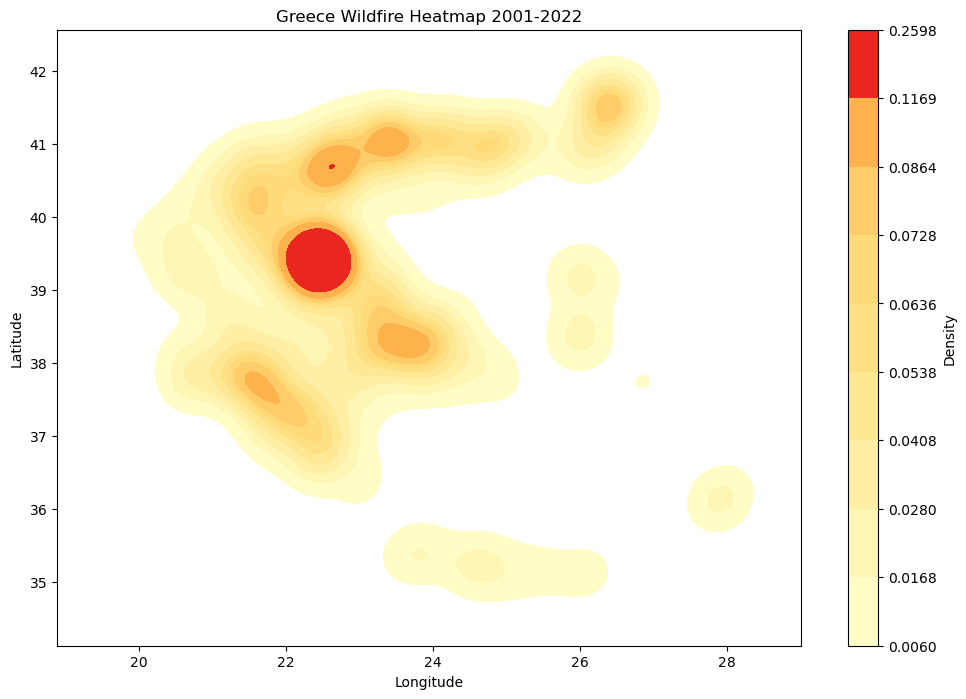

In [133]:
plt.figure(figsize=(12, 8))

# Create a 2D kernel density estimation (KDE) heatmap of the wildfire distribution
sns.kdeplot(
    data=df3,
    x='longitude',
    y='latitude',
    cmap='YlOrRd',  # Adjust the color map as needed
    cbar=True,
    cbar_kws={'label': 'Density'},
    fill=True,  # You can set this to False for an outline-only heatmap
)
plt.title('Greece Wildfire Heatmap 2001-2022')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Save the plot as a JPEG image
plt.savefig('Greece_Fire_heatmap.jpg', format='jpeg')

plt.show()

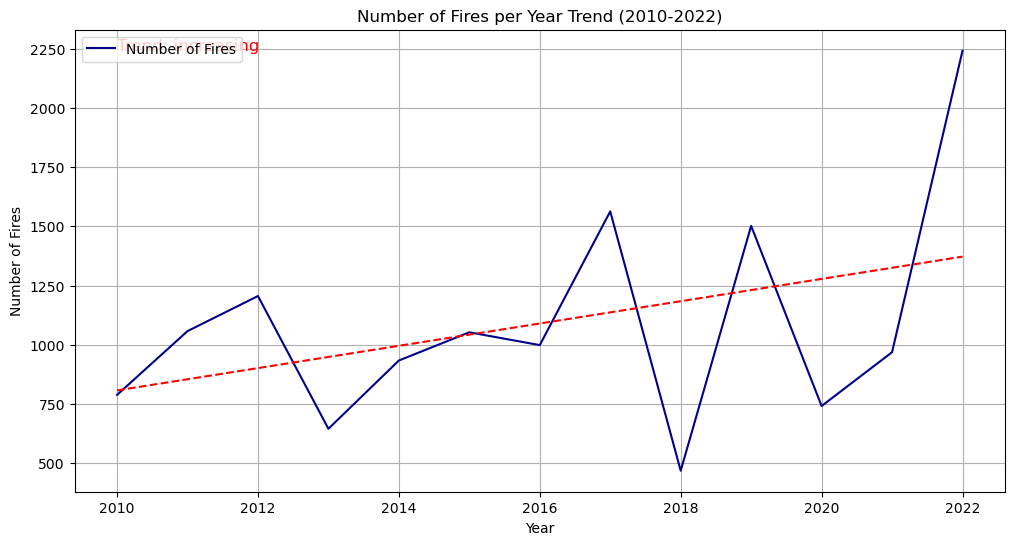

In [134]:
# Filter data for years 2010 to 2022
df_filtered = df1[(df1['Year'] >= 2010) & (df1['Year'] <= 2022)]

# Group by year and count the number of fires
fires_per_year = df_filtered.groupby('Year').size().reset_index(name='FireCount')

# Fit a linear regression model to analyze the trend
X = sm.add_constant(range(len(fires_per_year)))
model = sm.OLS(fires_per_year['FireCount'], X).fit()
slope = model.params[1]  # Get the slope of the regression line

# Check if the trend is increasing or decreasing
if slope > 0:
    trend_label = "Trend: increasing"
elif slope < 0:
    trend_label = "Trend: decreasing"
else:
    trend_label = "Trend: no significant change"

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(fires_per_year['Year'], fires_per_year['FireCount'], label='Number of Fires', color='darkblue')
plt.title('Number of Fires per Year Trend (2010-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.legend()
plt.grid(True)

# Add the trend label as text on the chart
plt.text(2010, max(fires_per_year['FireCount']), trend_label, fontsize=12, color='red')

# Fit a trend line to the data
trend_line = model.params[0] + model.params[1] * range(len(fires_per_year))

# Plot the trend line
plt.plot(fires_per_year['Year'], trend_line, label='Trend Line', linestyle='--', color='red')

# Save the plot as a JPEG image
plt.savefig('France_Number_of_Fires_Per_Year_Trend_2010_2022.jpg', format='jpeg')

plt.show()

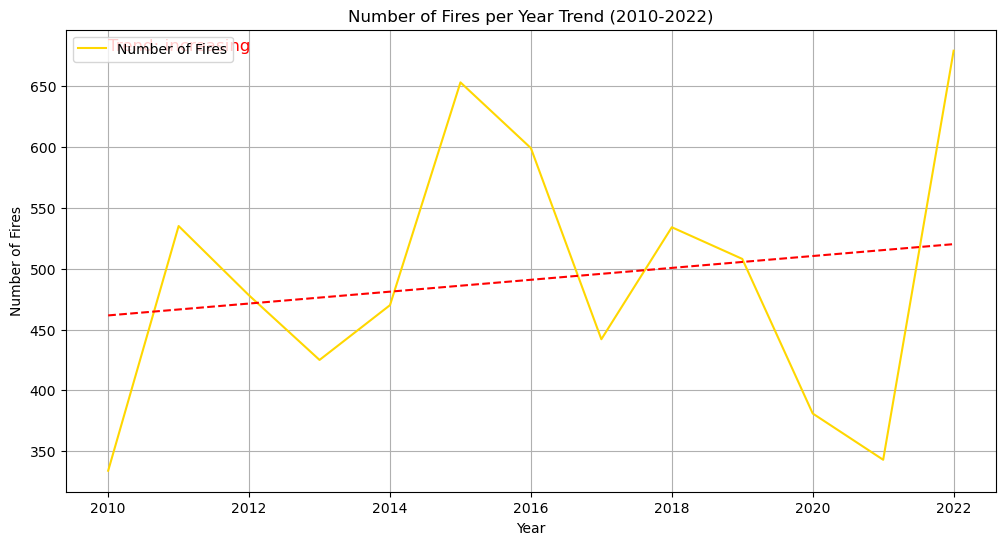

In [135]:
# Filter data for years 2010 to 2022
df2_filtered = df2[(df2['Year'] >= 2010) & (df2['Year'] <= 2022)]

# Group by year and count the number of fires
fires_per_year = df2_filtered.groupby('Year').size().reset_index(name='FireCount')

# Fit a linear regression model to analyze the trend
X = sm.add_constant(range(len(fires_per_year)))
model = sm.OLS(fires_per_year['FireCount'], X).fit()
slope = model.params[1]  # Get the slope of the regression line

# Check if the trend is increasing or decreasing
if slope > 0:
    trend_label = "Trend: increasing"
elif slope < 0:
    trend_label = "Trend: decreasing"
else:
    trend_label = "Trend: no significant change"

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(fires_per_year['Year'], fires_per_year['FireCount'], label='Number of Fires', color='gold')
plt.title('Number of Fires per Year Trend (2010-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.legend()
plt.grid(True)

# Add the trend label as text on the chart
plt.text(2010, max(fires_per_year['FireCount']), trend_label, fontsize=12, color='red')

# Fit a trend line to the data
trend_line = model.params[0] + model.params[1] * range(len(fires_per_year))

# Plot the trend line
plt.plot(fires_per_year['Year'], trend_line, label='Trend Line', linestyle='--', color='red')

# Save the plot as a JPEG image
plt.savefig('Germany_Number_of_Fires_Per_Year_Trend_2010_2022.jpg', format='jpeg')

plt.show()

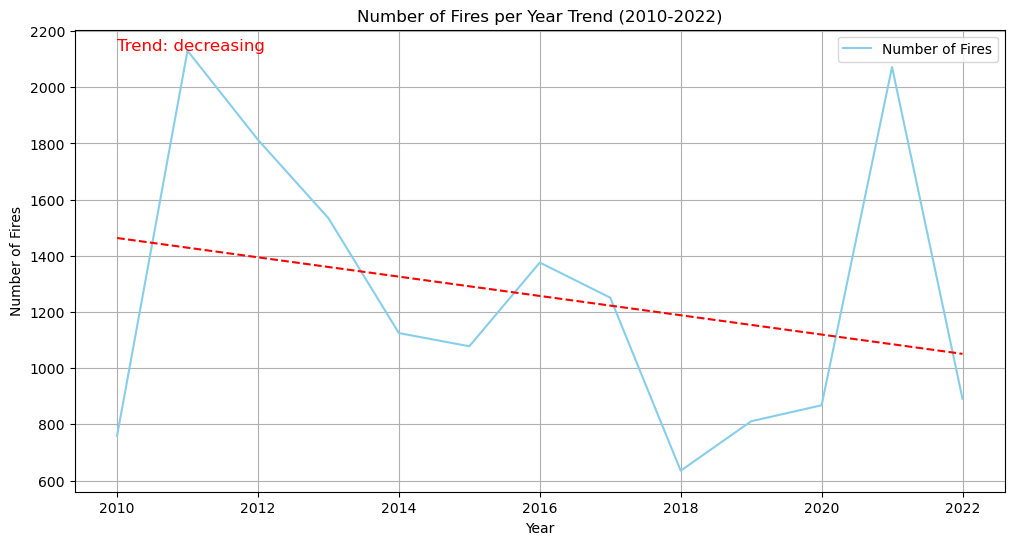

In [136]:
# Filter data for years 2010 to 2022
df3_filtered = df3[(df3['Year'] >= 2010) & (df3['Year'] <= 2022)]

# Group by year and count the number of fires
fires_per_year = df3_filtered.groupby('Year').size().reset_index(name='FireCount')

# Fit a linear regression model to analyze the trend
X = sm.add_constant(range(len(fires_per_year)))
model = sm.OLS(fires_per_year['FireCount'], X).fit()
slope = model.params[1]  # Get the slope of the regression line

# Check if the trend is increasing or decreasing
if slope > 0:
    trend_label = "Trend: increasing"
elif slope < 0:
    trend_label = "Trend: decreasing"
else:
    trend_label = "Trend: no significant change"

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(fires_per_year['Year'], fires_per_year['FireCount'], label='Number of Fires', color='skyblue')
plt.title('Number of Fires per Year Trend (2010-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.legend()
plt.grid(True)

# Add the trend label as text on the chart
plt.text(2010, max(fires_per_year['FireCount']), trend_label, fontsize=12, color='red')

# Fit a trend line to the data
trend_line = model.params[0] + model.params[1] * range(len(fires_per_year))

# Plot the trend line
plt.plot(fires_per_year['Year'], trend_line, label='Trend Line', linestyle='--', color='red')

# Save the plot as a JPEG image
plt.savefig('Greece_Number_of_Fires_Per_Year_Trend_2010_2022.jpg', format='jpeg')

plt.show()

In [137]:
df1 . head()

latitude  longitude  brightness  acq_time  confidence  bright_t31  \
acq_date                                                                        
2001-02-07   42.6874     2.3569       304.2      1117          58       283.3   
2001-02-07   43.1315    -0.3839       308.1      1117          66       285.5   
2001-02-12   42.5944     2.2348       303.7      1136          53       278.2   
2001-02-13   42.5821     2.2194       326.7      1041          85       285.4   
2001-02-13   42.5806     2.2347       327.4      1041          85       286.4   

             frp daynight  Year  
acq_date                         
2001-02-07  11.3        D  2001  
2001-02-07  10.0        D  2001  
2001-02-12  22.5        D  2001  
2001-02-13  44.2        D  2001  
2001-02-13  45.4        D  2001

In [138]:
df2 . head()

latitude  longitude  brightness  acq_time  confidence  bright_t31  \
acq_date                                                                        
2001-01-25   51.4900     6.7105       304.9      2119          62       277.1   
2001-01-26   51.6056     7.0245       302.8      1050          54       275.1   
2001-01-30   51.4855     7.5162       306.8      1026          64       276.1   
2001-02-24   51.4888     7.5135       304.2      2130          59       267.5   
2001-03-06   49.3467     6.7334       303.9      1056          57       283.9   

             frp daynight  Year  
acq_date                         
2001-01-25  12.8        N  2001  
2001-01-26   8.9        D  2001  
2001-01-30  19.8        D  2001  
2001-02-24  12.2        N  2001  
2001-03-06   7.3        D  2001

In [139]:
df3 . head()

latitude  longitude  brightness  acq_time  confidence  bright_t31  \
acq_date                                                                        
2001-02-05   38.5614    24.1307       303.2       952          55       287.3   
2001-02-09   38.0907    24.5261       333.6       928          89       289.0   
2001-02-09   38.0891    24.5373       303.6       928          55       286.0   
2001-02-16   35.2956    23.5819       317.8       934          68       282.8   
2001-02-19   40.7432    22.5022       305.8      1004          62       281.7   

             frp daynight  Year  
acq_date                         
2001-02-05  10.6        D  2001  
2001-02-09  34.5        D  2001  
2001-02-09   5.8        D  2001  
2001-02-16  18.8        D  2001  
2001-02-19  17.0        D  2001